<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2020/%EA%B9%80%EB%AF%BC%EC%A7%80/200917_DIP_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>DIP_Numpy02<h1>

<h2>image load<h2>

In [1]:
import numpy as np
import cv2
from skimage import data

In [3]:
cat_rgb = data.chelsea()
cat_gray = cv2.cvtColor(cat_rgb,cv2.COLOR_RGB2GRAY)

print(f"ndim:{cat_rgb.ndim},shape:{cat_rgb.shape},dtype:{cat_rgb.dtype},itemsize:{cat_rgb.itemsize}")
print(f"ndim:{cat_gray.ndim},shape:{cat_gray.shape},dtype:{cat_gray.dtype},itemsize:{cat_gray.itemsize}")

ndim:3,shape:(300, 451, 3),dtype:uint8,itemsize:1
ndim:2,shape:(300, 451),dtype:uint8,itemsize:1


<h2>이미지 옆에 붙이기<h2>

In [5]:
#horizontal 붙임
cat_hstack = np.hstack( (cat_rgb,cat_rgb) )
print(cat_hstack.shape)

(300, 902, 3)


위에 보면 shape가 (300, 451, 3) 이렇게 되어있음 그걸 수평으로 두 개를 붙인 거니까 높이 그대로 가로 길이 2배됨

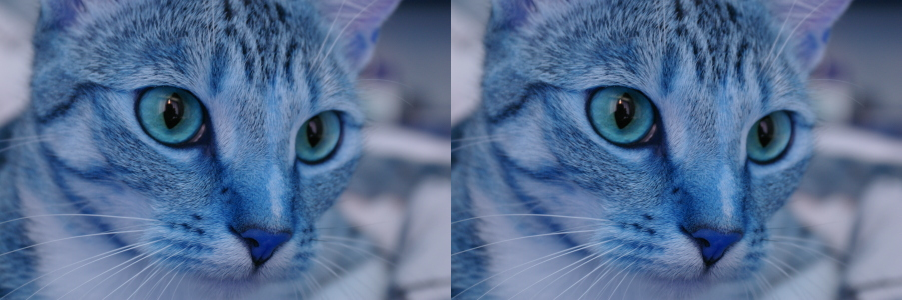

In [6]:
#OpenCV는 bgr 형태로 읽어야하는데 코랩에서는 rgb로 하니까 지금 파랗게 보이는 것,,(주피터노트북에서 matplotlib 사용)

from google.colab.patches import cv2_imshow

cv2_imshow(cat_hstack)

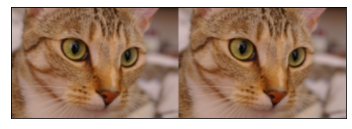

In [17]:
import matplotlib.pyplot as plt

plt.imshow(cat_hstack, interpolation='bicubic')
plt.xticks([]); plt.yticks([])
plt.show()

In [7]:
cat_vstack = np.vstack( (cat_rgb,cat_rgb))
print(cat_vstack.shape)

(600, 451, 3)


In [10]:
r = np.stack( (cat_rgb,cat_rgb), axis=0)
print(r.shape)

(2, 300, 451, 3)


In [11]:
r = np.stack( (cat_rgb,cat_rgb), axis=-1)
print(r.shape)

(300, 451, 3, 2)


In [12]:
r = np.stack( (cat_rgb,cat_rgb), axis=1)
print(r.shape)

(300, 2, 451, 3)


In [13]:
img_hsplit= np.hsplit(cat_rgb[:,:450,:],3)
print(np.shape(img_hsplit))

(3, 300, 150, 3)


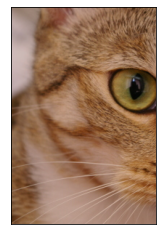

In [19]:
plt.imshow(img_hsplit[0])
plt.xticks([]),plt.yticks([])
plt.show()

In [14]:
img_hsplit= np.hsplit(cat_rgb,(200,300,350))
print(len(img_hsplit))

for idx, c in enumerate(img_hsplit):
  print(f"{idx:02d}, {c.shape}")

4
00, (300, 200, 3)
01, (300, 100, 3)
02, (300, 50, 3)
03, (300, 101, 3)


In [15]:
img_vsplit = np.vsplit(cat_rgb,2)
print(np.shape(img_vsplit))

(2, 150, 451, 3)


In [16]:
img_mono = np.split(cat_rgb,3,axis=-1)
print(np.shape(img_mono))

(3, 300, 451, 1)


# Test

* 'cat_gray'의 값이 'cat_gray'의 평균 보다 작은 값을 가지는 pixel들은 원래의 값을 그대로 출력하고, 큰 값들은 검은색(0, 0, 0)으로 만들어서 'cat_rgb' 영상을 출력하시오.


119.48269031781227


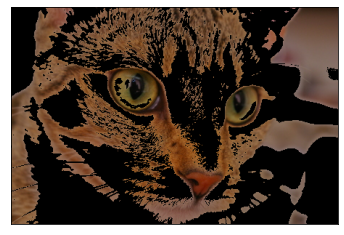

In [18]:
#Test

g_m = np.mean(cat_gray)
print(g_m)

r = cat_rgb.copy()
r[cat_gray>g_m] = (0,0,0)

plt.figure()
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()